Yuhan Chen
3009389875

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the APS Failure data from:
https://archive.ics.uci.edu/ml/datasets/
APS+Failure+at+Scania+Trucks
. The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive
class and 171 columns, of which one is the class column. All attributes are nu-
meric

In [44]:
traindf=pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20)
testdf=pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20)
traindf.replace('na', np.nan, inplace=True)
testdf.replace('na', np.nan, inplace=True)

### (b) Data Preparation

Research what types of techniques are usually used for dealing with data with
missing values.
2
Pick at least one of them and apply it to this data in the
next steps.


In [45]:
from sklearn.impute import SimpleImputer

In [46]:
traindf1=traindf.iloc[:,1:]
testdf1=testdf.iloc[:,1:]

In [47]:
traindf2=pd.DataFrame(SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(traindf1),columns=traindf1.columns)
testdf2=pd.DataFrame(SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(testdf1),columns=testdf1.columns)

For each of the 170 features, calculate the coefficient of variation
CV
=
s
m
,
where
s
is sample standard deviation and
m
is sample mean.

In [48]:
def cv(i):
    return np.std(i)/np.mean(i)
cv_list=[]
feature = traindf2.columns
list_cv=pd.DataFrame(feature[1:],columns=['feature'])
for i in traindf2.columns[1:]:
    cv_list.append(cv(traindf2[i]))
cv_df=pd.DataFrame(cv_list,columns=['cv'])
list_cv=pd.concat([list_cv,cv_df],axis=1)
list_cv

,feature,cv
0,ab_000,10.383407
1,ac_000,2.310221
2,ad_000,244.320780
3,ae_000,24.199935
4,af_000,19.471133
...,...,...
164,ee_007,5.012712
165,ee_008,3.259052
166,ee_009,5.691565
167,ef_000,49.366248


Plot a correlation matrix for your features using pandas or any other tool

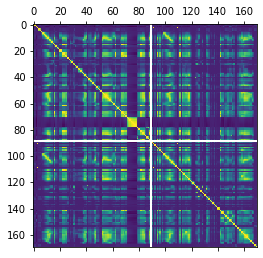

In [49]:
dftotal=pd.concat([traindf2,testdf2])
plt.matshow(dftotal.corr())
plt.show()

Pick
b
√
170
c
features with highest
CV
, and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization

In [50]:
col = list_cv.sort_values(by=['cv'],ascending=False)
plot_list=col.iloc[:int(np.sqrt(170)),:]
df_helper = traindf2[plot_list['feature']]

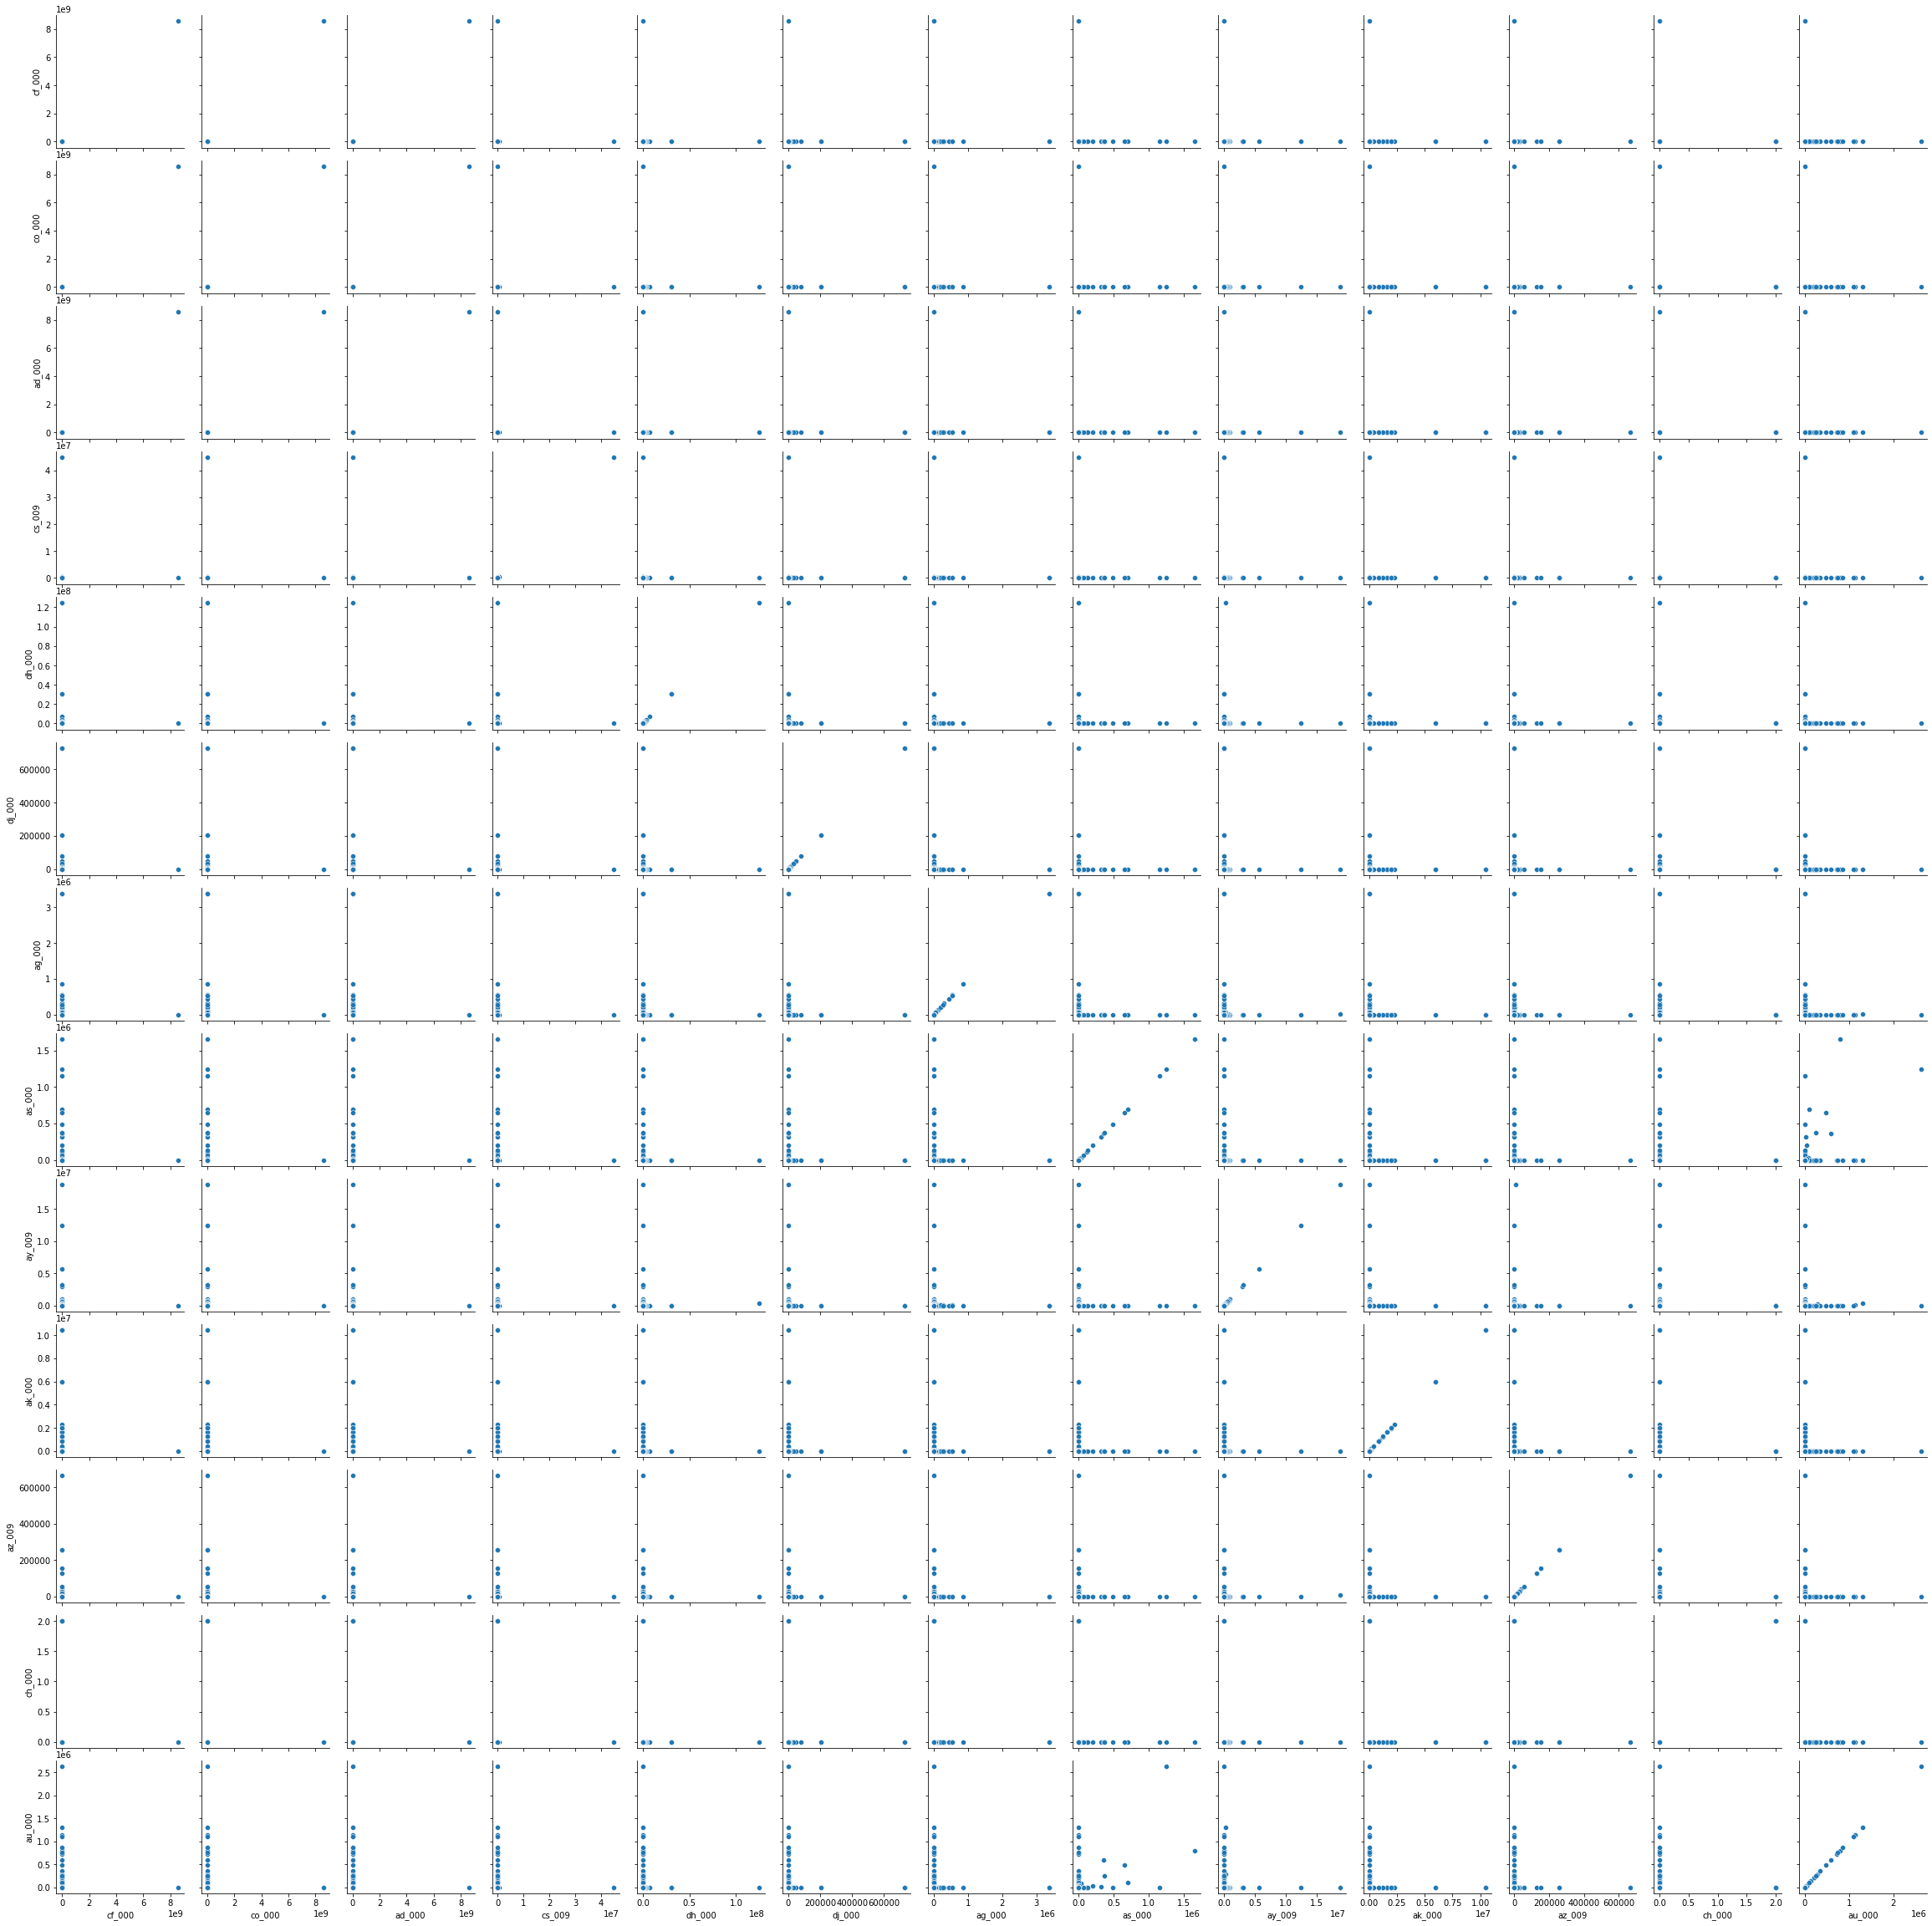

In [51]:
scatter=sns.PairGrid(df_helper)
scatter.map(sns.scatterplot)

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


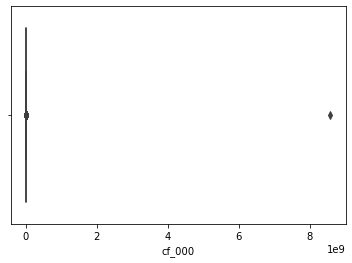

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


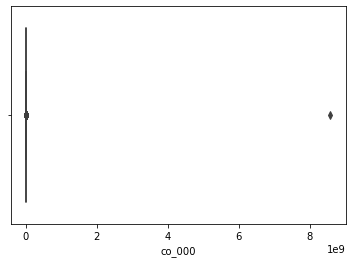

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


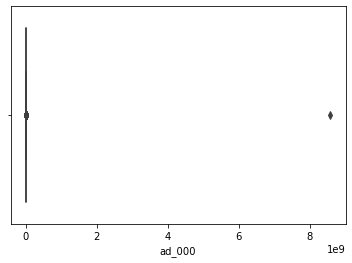

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


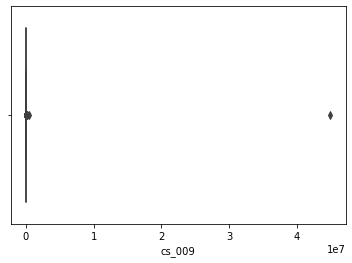

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


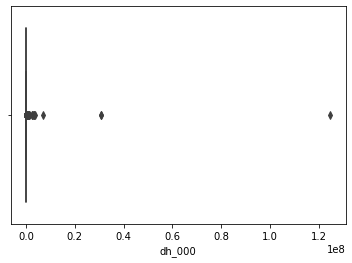

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


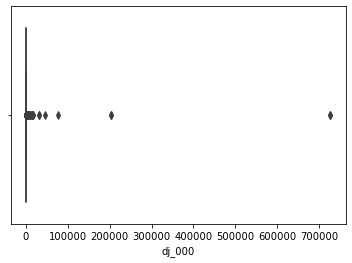

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


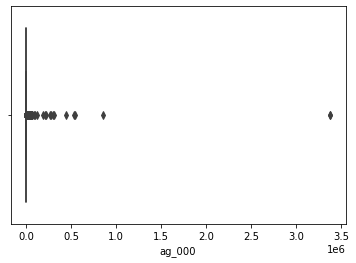

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


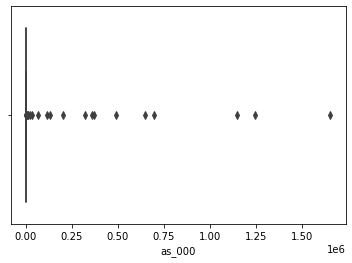

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


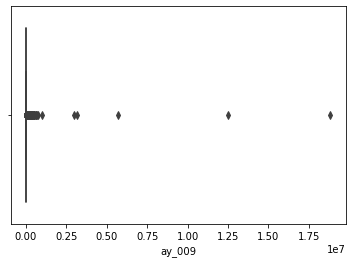

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


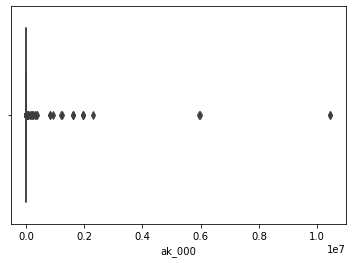

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


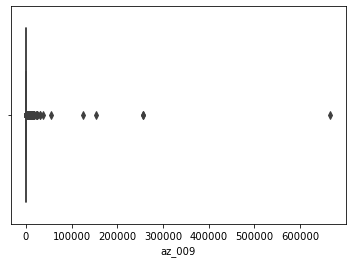

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


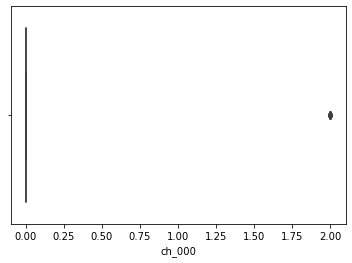

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


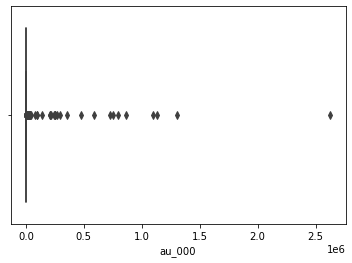

In [52]:

for i in range (0,13):
    sns.boxplot(df_helper.iloc[:,i])
    plt.show()

Determine the number of positive and negative data. Is this data set imbal-
anced?

In [53]:
from collections import Counter
df3=pd.concat([traindf['class'],testdf['class']])
Counter(df3)

Counter({'neg': 74625, 'pos': 1375})

Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

In [55]:
df3 = df3.replace("pos",1)
df3 = df3.replace("neg",0)
df3_train = df3[0:60000]
df3_test = df3[60000:]
model=RandomForestClassifier(oob_score=True)
model.fit(traindf2,df3_train)
y_pred=model.predict(traindf2)
confusion_matrix(df3_train,y_pred)

array([[59000,     0],
       [    0,  1000]])

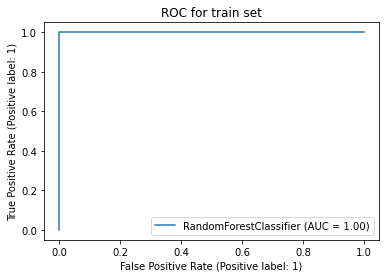

In [56]:
train_roc=RocCurveDisplay.from_estimator(model,traindf2,df3_train)
plt.title("ROC for train set")
plt.show()

In [57]:
y_pred=model.predict(testdf2)
confusion_matrix(df3_test,y_pred)

array([[15610,    15],
       [  100,   275]])

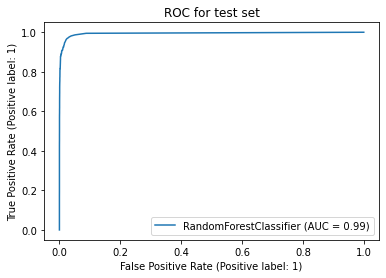

In [58]:
test_roc=RocCurveDisplay.from_estimator(model,testdf2,df3_test)
plt.title("ROC for test set")
plt.show()

In [59]:
print(1-model.oob_score_)
print(1-model.score(testdf2,df3_test))

0.006149999999999989
0.007187500000000013


(d)
Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c

In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [61]:
model2=BalancedRandomForestClassifier(n_estimators=100, random_state=0,oob_score=True)
model2.fit(traindf2,df3_train)
y_pred=model.predict(traindf2)
confusion_matrix(df3_train,y_pred)

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:683: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


array([[59000,     0],
       [    0,  1000]])

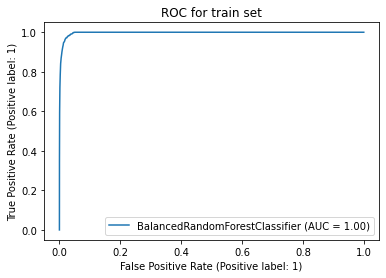

In [62]:
train_roc=RocCurveDisplay.from_estimator(model2,traindf2,df3_train)
plt.title("ROC for train set")
plt.show()

In [63]:
y_pred=model2.predict(testdf2)
confusion_matrix(df3_test,y_pred)

array([[14832,   793],
       [    6,   369]])

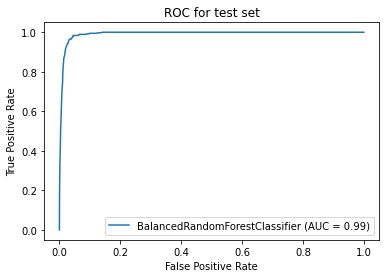

In [64]:
test_roc=RocCurveDisplay.from_estimator(model2,testdf2,df3_test)
plt.title("ROC for test set")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [65]:
test_error =  1 - model2.score(testdf2, df3_test)
test_error

0.04993749999999997

In [66]:
bag_error = 1 - model2.oob_score_
bag_error

0.03318333333333334

###  (e) XGBoost and Model Trees

In [67]:
import xgboost as xgb
from sklearn import preprocessing

In [68]:
df4_train=preprocessing.normalize(traindf2,axis=0)
df4_test=preprocessing.normalize(testdf2,axis=0)
df5_train=pd.DataFrame(df4_train,columns=traindf2.columns)
df5_test=pd.DataFrame(df4_test,columns=testdf2.columns)

In [69]:
dtrain=xgb.DMatrix(df5_train,df3_train)
num_round=10
for i in list(range(0,30)):
    param={'max_depth':6,'alpha':i}
    te=xgb.cv(param,dtrain,num_round,nfold=5,metrics={'error'},seed=0)
    print(i,np.mean(te['test-error-mean']))


0 0.008071666666666666
1 0.0078
2 0.008021666666666667
3 0.007988333333333333
4 0.008115
5 0.007994999999999999
6 0.008038333333333333
7 0.00803
8 0.008126666666666667
9 0.008303333333333333
10 0.008403333333333334
11 0.008348333333333334
12 0.008445000000000001
13 0.00844
14 0.008455
15 0.008473333333333334
16 0.008351666666666665
17 0.008346666666666665
18 0.008383333333333333
19 0.008426666666666667
20 0.00853
21 0.008485000000000001
22 0.008463333333333333
23 0.008510000000000002
24 0.008573333333333334
25 0.008668333333333333
26 0.008566666666666667
27 0.008688333333333334
28 0.008711666666666668
29 0.008821666666666669


1 yield smallest mse

In [70]:
model3=xgb.XGBClassifier(n_estimator=10,reg_alpha=1,objective='binary:logistic')
model3.fit(df5_train,df3_train)
y_pred=model3.predict(df5_train)
confusion_matrix(df3_train,y_pred)

[21:45:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([[59000,     0],
       [    1,   999]])

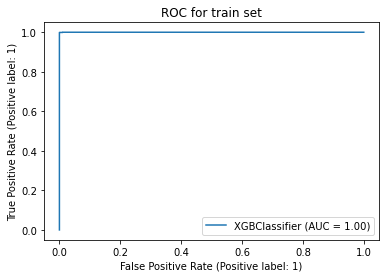

In [71]:
train_roc=RocCurveDisplay.from_estimator(model3,df5_train,df3_train)
plt.title("ROC for train set")
plt.show()

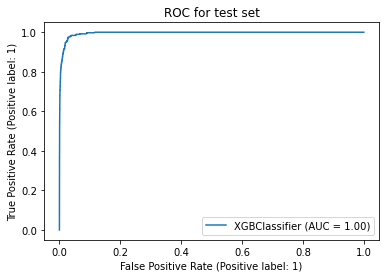

In [72]:
y_pred=model3.predict(df5_test)
confusion_matrix(df3_test,y_pred)
test_roc=RocCurveDisplay.from_estimator(model3,df5_test,df3_test)
plt.title("ROC for test set")
plt.show()

In [73]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
df_xtrain,df_ytrain=oversample.fit_resample(df5_train,df3_train)

In [74]:
dtrain=xgb.DMatrix(df_xtrain,df_ytrain)
num_round=10
mse = []
for i in list(range(0,30)):
    param={'max_depth':6,'alpha':i}
    boost_result=xgb.cv(param,dtrain,num_round,nfold=5,metrics={'error'},seed=0)
    mse.append(np.mean(boost_result['test-error-mean']))
    print(i,np.mean(boost_result['test-error-mean']))

0 0.023248305084745766
1 0.023028813559322035
2 0.023288135593220342
3 0.023567796610169493
4 0.02352203389830508
5 0.02366694915254237
6 0.023711864406779668
7 0.024031355932203385
8 0.02426271186440678
9 0.02424830508474576
10 0.024878813559322033
11 0.024872881355932203
12 0.024872881355932207
13 0.02520762711864407
14 0.025249152542372876
15 0.02556779661016949
16 0.025556779661016948
17 0.025597457627118646
18 0.025877966101694915
19 0.026045762711864408
20 0.026137288135593222
21 0.0264771186440678
22 0.026764406779661014
23 0.02675847457627119
24 0.02700677966101695
25 0.02713983050847458
26 0.027326271186440675
27 0.027355932203389825
28 0.027489830508474578
29 0.02767118644067797


In [75]:
min(mse)

0.023028813559322035

1 yield smallest mse

[22:00:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




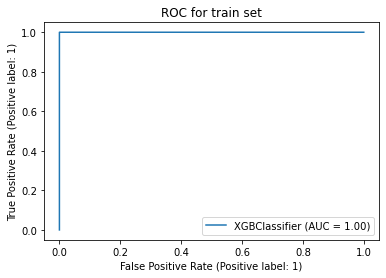

In [76]:
model4=xgb.XGBClassifier(n_estimator=10,reg_alpha=1,objective='binary:logistic')
model4.fit(df_xtrain,df_ytrain)
y_pred=model4.predict(df_xtrain)
confusion_matrix(df_ytrain,y_pred)
train_roc=RocCurveDisplay.from_estimator(model4,df_xtrain,df_ytrain)
plt.title("ROC for train set")
plt.show()

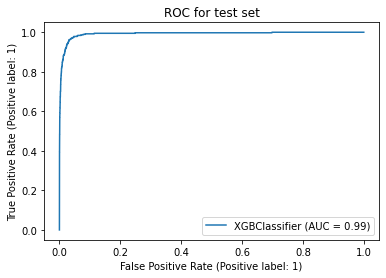

In [77]:
y_pred=model3.predict(df5_test)
confusion_matrix(df3_test,y_pred)
test_roc=RocCurveDisplay.from_estimator(model4,df5_test,df3_test)
plt.title("ROC for test set")
plt.show()

### ISLR 6.6.3

a. iv,since model becomes more flexible, the RSS keep decreasing.
b. ii,  model becomes more flexible, the RSS keep decreasing but the overfitting make test rss increase
c. iii, model is more flexible and variance increase
d. iv, model is more flexible and bias decrease
e. v, it will not be affected


### ISLR 6.6.5

see attachment

### ISLR 8.4.5

In [80]:
p = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.7]
##p(red) = 6/10=0.6
##p(not red) = 4/10=0.4
##p is red in most of the case
p = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.7)/10 
p

0.445

### ISLR 9.7.3

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


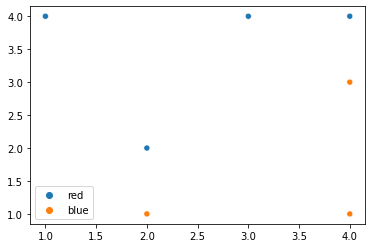

In [81]:
x = [3, 2, 4, 1, 2, 4, 4]
x_1 = [4, 2, 4, 4, 1, 3, 1]
y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
sns.scatterplot(x, x_1, hue = y)
plt.show()

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


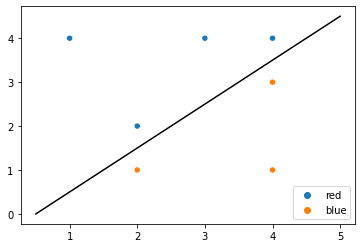

In [82]:
sns.scatterplot(x, x_1, hue = y)
plt.plot([0.5, 5], [0, 4.5],'black')
plt.show()

c. classified as blue

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


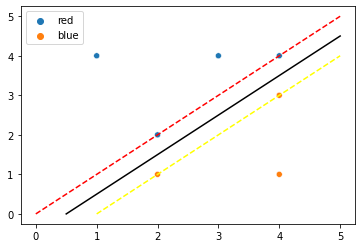

In [83]:
sns.scatterplot(x, x_1, hue = y)
plt.plot([0.5, 5], [0, 4.5],'black')
plt.plot([0, 5], [0, 5],'red',linestyle='--')
plt.plot([1, 5], [0, 4],'yellow',linestyle='--')
plt.show()

e. (2,1), (2,2), (4,3), (4,4)

f.  a slight movement of point (4,1) will not cause major effect on maximal margin hyperplane.

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


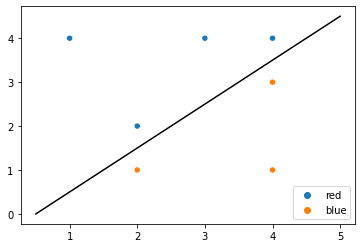

In [84]:
sns.scatterplot(x, x_1, hue = y)
plt.plot([0.5, 5], [0, 4.5],'black')
plt.show()

/Users/yuhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


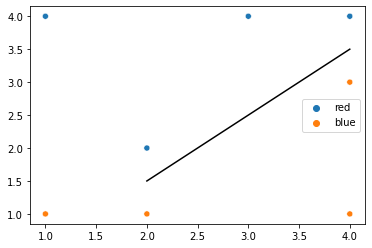

In [85]:
x = [3, 2, 4, 1, 2, 4, 4, 1]
x_1 = [4, 2, 4, 4, 1, 3, 1, 1]
y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']
sns.scatterplot(x, x_1, hue = y)
plt.plot([2,4],[1.5,3.5],'black')
plt.show()